<a href="https://colab.research.google.com/github/euna-jeong20/deep-learning-from-scratch/blob/main/4%2C5%2C6%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4장

## 4.2.1 오차제곱합




In [ ]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#예1 : 2일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(sum_squares_error(np.array(y), np.array(t)))

#예2 : 7일 확률이 가장 높다고 추정함
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 4.2.2 교차 엔트로피 오차

In [ ]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1*e - 7  #로그 0은 계산 될 수 없으니까 젤 작은값을 임의로 설정
  return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))


y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


## 4.2.3 미니배치 학습

* 훈련 데이터로부터 일부만 골라 학습을 수행하는 것을 미니배치 학습이라고 한다.
* 예로 60,000장의 훈련 데이터 중에서 100장을 무작위로 뽑아서 그 100장을 가지고 학습

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master')
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True) #flatten은 true로 자동 설정

print(x_train.shape)  #(60000, 784(28X28))
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
# 훈련데이터에서 무작위로 10장만 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0 부터 59999의 숫자중에서 10개를 뽑는다 -> 인덱스로 사용

#x_batch = x_train[batch_mask]    xtrain에서 10개 임의로 추출해서 xbatch에 저장
#t_batch = t_train[batch_mask]

print(np.random.choice(60000,10))
print(batch_mask)

[51007 20656 41051  5989  2973 56320 44786 19294 13071 57467]
[26903 14521 39412 24000 57982 20579  4281 42596 48801 45504]


## 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:           # 데이터가 하나인 경우 (10, )
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)        #(1, 10)이 된다

  batch_size = y.shape[0]
  return - np.sum( t*np.log(y + 1*e - 7)) / batch_size  

print(batch_size)

10


In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshpe(1, y.size)

  batch_size = y.shape[0]
  return -np.sum( t*np.log(y[np.arange(batch_size), t] + 1*e - 7)) / batch_size  

In [ ]:
#예시 해서 봐봐

## 4.3.1 미분

In [ ]:
#나쁜 구현의 예
def numerical_diff(f, x):
  h = 10e-50
  return ( f(x+h) - f(x) ) / h

* 나쁜점 1 : 반올림 오차 (엄청 작은 값(1e-50)을 float32형으로 나타내면 0으로 인식 그래서 1e-4사용)
* 나쁜점 2 : (x + h) 와 x 사이의 기울기라서 약간의 오차가 생긴다

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h)      #중앙차분

## 4.3.2 수치 미분의 예

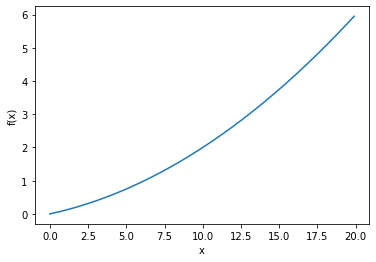

0.1999999999990898
0.2999999999986347


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
  return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

## 4..3 편미분

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2


* (3, 4)에서 각각 변수에 대한 편미분 구하기

In [ ]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


## 4.4 기울기(그래디언트)

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]            #기존의 x값
    
    x[idx] = tmp_val + h        #x+h
    fxh1 = f(x)                 #f(x+h)

    #f(x-h) 계산
    x[idx] = tmp_val - h        #x-h
    fxh2 = f(x)                 #f(x-h)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val

  return grad

## 4.4.1 경사법(경사 하강법)

* 경사법은 최솟값을 찾을때에는 경사 하강법이라하고, 최댓값을 찾을때에는 경사 상승법이라고 한다.

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [ ]:
import numpy as np


def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x = init_x, lr=0.1, step_num = 100)       #(0,0)에 가까운 값이 나오고 실제로 이 함수는 (0,0)에서 최솟값을 갖는다.

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
#학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=10.0, step_num=100))

#학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x = init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


## 4.4.2 신경망에서의 기울기

* 여기서의 기울기는 가중치 매개변수에 대한 손실 함수의 기울기

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master')

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3) # 정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)    #예측에서 softmax를 사용하지 않아서 손실함수에서 사용

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss 

In [ ]:
net = simpleNet()
print(net.W)        #가중치 매개변수

x = np.array([0.6, 0.9])
p = net.predict(x)

print(p)
print(np.argmax(p))     #최댓값의 인덱스

t = np.array([0, 0, 1]) #정답 레이블
print(net.loss(x, t))



[[-0.09286272  0.62021819 -0.16067901]
 [ 1.03127474 -0.00835278 -0.07892151]]
[ 0.87242964  0.36461342 -0.16743676]
0
1.7104147344938752


In [ ]:
def f(W):       #여기에서 정의한 f(w) 함수의 인수 w는 더미로 만든것
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.3068565   0.18466881 -0.49152531]
 [ 0.46028475  0.27700321 -0.73728796]]


## 4.5.1 2층 신경망 클래스 구현하기

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master')

from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    #가중치 초기화
    self.params = {}    #딕셔너리를 하나 만듬
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):     #추론
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)     #앞과는 달리 softmax함수를 추론에 사용, 그러므로 loss에서 사용안해도된다.

    return y

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  
  def accuracy(self, x, t):         #학습할때 사용x
    y = self.predict(x)
    y = np.ardmax(y, axis=1)
    t = np.argmax(t, axis=1)        #t가 원핫인코딩임을 알 수 있다.

    accuracy = np.sum(y == t) / float(x.shape[0])
    return accuracy
  
   # x : 입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

## 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True, flatten=True)

train_loss_list = []

#하이퍼파라미터   수동으로 넣어야 하는 매개변수

iters_num = 10000  #반복 횟수
train_size = x_train.shape[0]       #60000개
batch_size = 100  #미니배치크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)     #0~59999 숫자중 100개 선택
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #기울기 계산
  grad = network.gradient(x_batch, t_batch)

  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):      #각 가중치마다 갱신 해줘야 함
    network.params[key] -= learning_rate * grad[key]

  #학습경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


#하이퍼파라미터   수동으로 넣어야 하는 매개변수
iters_num = 10000  #반복 횟수
train_size = x_train.shape[0]
batch_size = 100  #미니배치크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #기울기 계산
  grad = network.gradient(x_batch, t_batch)

  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  #1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc : str(train_acc) , str(test_acc)")

train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)
train acc, test acc : str(train_acc) , str(test_acc)


KeyboardInterrupt: ignored

#5장 오차역전파법

* 역전파는 기울기 갱신이 아니다. 기울기 구하는 방법

In [ ]:
class MulLayer:
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    out = x * y

    return out

  def backward(self, dout):
    dx = dout * self.y      #x와 y를 바꾼다.
    dy = dout * self.x

    return dx, dy

In [ ]:
apple = 100
apple_num = 2
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

#순전파  순전파로 저장을 해야 역전파를 알 수 있다
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)  #220

220.00000000000003


In [ ]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple_price)
print(dapple, dapple_num, dtax)

1.1
2.2 110.00000000000001 200


In [ ]:
class AddLayer:
  def __init__(self):
    pass    #초기화가 필요하지 않아서
  
  def forward(self, x, y):
    out = x + y

    return out

  def backward(self, dout):   #사실 백워드는 필요없다
    dx = dout * 1 
    dy = dout * 1

    return dx, dy

In [ ]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#순전파
apple_price = mul_apple_layer.forward(apple, apple_num) #(1)
orange_price = mul_orange_layer.forward(orange, orange_num)  #(2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #(3)
price = mul_tax_layer.forward(all_price, tax) #(4)

#역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #(3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #(2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) #(1)

print(price)  #715
print(dapple_num, dapple, dorange, dorange_num, dtax)   # 110 2.2 3.3 165 650

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [ ]:
import numpy as np

def ReLU(x):
  return np.maximum([x,0])

In [ ]:
class Relu:
  def __init__(self):
    self.mask = None

  def forward(self,x):
    self.mask = (x <= 0)    #bool형이 나온다, 0보다 작은거에 true를 준다
    out = x.copy()          # 카피시킨것은 원본을 바꿔도 카피했던 그때 그값 그대로 유지함.
    out[self.mask] = 0
    
    return out

  def backward(self, dout):
    dout[self.mask] = 0     # 0이하의 값만 0으로 바꿔준다.
    dx = dout

    return dx



In [ ]:
x = np.array( [[1.0, -0.5], [-2.0, 3.0]] )
print(x)
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


In [ ]:
class Sigmoid:
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1 / (1+np.exp(-x))
    self.out = out      #역전파에 사용할 y 저장

    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.out

    return dx

## 5.6.1 Affine 계층

In [ ]:
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

print(X.shape)  # (1, 2)
print(W.shape)  # (2, 3)
print(B.shape)  # (1, 3)

Y = np.dot(X, W) + B
print(Y)

(2,)
(2, 3)
(3,)
[0.64478654 0.54825872 0.6376374 ]


In [ ]:
X_dot_W = np.array( [[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
print(X_dot_W)
print(X_dot_W + B)

[[ 0  0  0]
 [10 10 10]]
[[ 1  2  3]
 [11 12 13]]


In [ ]:
dY = np.array( [[1, 2, 3], [4, 5, 6]] )
print(dY)

dB = np.sum(dY, axis=0) #열끼리 더한다
print(dB)


[[1 2 3]
 [4 5 6]]
[5 7 9]


In [ ]:
class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None
  
  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b

    return out
  
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)

    return dx

In [ ]:
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None #손실
    self.y = None     #softmax 출력
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss
  
  def backward(self, dout = 1):
    batch_size = self.t.shape[0]  #열의 개수
    dx = (self.y - self.t) / batch_size
    
    return dx

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')

from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

    #가중치 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

    #계층생성
    self.layers = OrderdDict()  #
    self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
    self.layers['Relu1'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
    self.lastLayer = SoftmaxWithLoss()

  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  # x : 입력 데이터, t : 정답 레이블
  def loss(self, x, t):
    y = self.predict(x)
    return self.lastLayer,forward(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)

    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])

    return accuracy

  # x :입력 데이터, t : 정답 레이블
  def numerical_gradient(self, x, t):
    loss_W = lambda W: self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_graident(loss_W, self.params['W1'])
    grads['b1'] = numerical_graident(loss_W, self.params['b1'])
    grads['W2'] = numerical_graident(loss_W, self.params['W2'])
    grads['b2'] = numerical_graident(loss_W, self.params['b2'])

  def gradient(self, x, t):
    #순전파
    self.oss(x, t)

    #역전파
    dout = 1
    dout = self.lastLayer.backward(dout)

    layers = list(self.layers.values())
    last.reverse()
    for layer in layers:
      dout = layer.backward(dout)


    # 결과 저장
    grads = {}
    grads['W1'] = self.layers['Affine1'].dW 
    grads['b1'] = self.layers['Affine1'].db 
    grads['W2'] = self.layers['Affine2'].dW 
    grads['b2'] = self.layers['Affine2'].db 

    return grads

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch05")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch05')

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

#데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label= True)

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

x_batch = x_train[:3]   #0,1,2행 떼온다     (3, 784)
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

#각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.

for key in grad_numerical.keys():   #grad_numerical가 딕셔너리다
  diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]))
  print(key + ":" + str(diff))


W1:1.8346581235635745e-10
b1:7.676037822143718e-10
W2:7.129719107536182e-08
b2:1.418580851550444e-07


train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.7921166666666667, 0.7979
train acc, test acc | 0.87775, 0.8798
train acc, test acc | 0.8978666666666667, 0.9012
train acc, test acc | 0.9075333333333333, 0.9108
train acc, test acc | 0.9137833333333333, 0.9168
train acc, test acc | 0.9190666666666667, 0.9216
train acc, test acc | 0.9236166666666666, 0.9244
train acc, test acc | 0.9270166666666667, 0.9283
train acc, test acc | 0.93025, 0.9303
train acc, test acc | 0.933, 0.9331
train acc, test acc | 0.9358, 0.9355
train acc, test acc | 0.9383333333333334, 0.9378
train acc, test acc | 0.9401833333333334, 0.9389
train acc, test acc | 0.94375, 0.9424
train acc, test acc | 0.9451833333333334, 0.9419
train acc, test acc | 0.94635, 0.9448


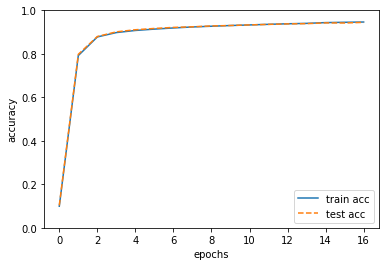

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master/ch04')

from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


#하이퍼파라미터   수동으로 넣어야 하는 매개변수
iters_num = 10000  #반복 횟수
train_size = x_train.shape[0]
batch_size = 100  #미니배치크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

#1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
  #미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  #오차역전파법으로 기울기를 구한다. 수치미분으로 하면 엄청 느리다.
  grad = network.gradient(x_batch, t_batch)

  #매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  #학습경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  #1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))



markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')

plt.show()

#6장

In [ ]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr
  
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

In [ ]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = Momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}

      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

      for key in params.key():
        self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
        params[key] += self.v[key]

In [ ]:
class AdaGrad:    #학습을 적게 할때 사용하면 좋다, 넘 많이 하다가 갱신량이 0이 될 수 있다.
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
  
  def update(self, params, grads ):
    if self.h is None:
      self.h = {}

      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

      for key in params.key():
        self.h[key] += grads[key] * grads[key]      #elementwise 곱
        params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [ ]:
#RMSProp

In [ ]:
#Adam

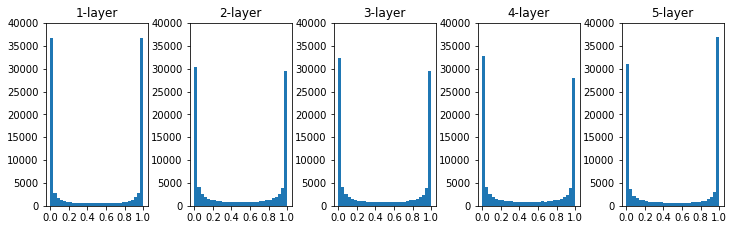

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  #100개의 데이터
node_num = 100                  #각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           #은닉층이 5개
activations = {}                #이곳에 홣성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1   #표준편차가 1이라서 1을 곱한다 (100,100)
  a = np.dot(x, w)          #(1000,100)
  z = sigmoid(a)
  activations[i] = z

plt.figure(figsize=(10, 3))
for i, a in activations.items():
   plt.subplot(1, len(activations), i+1)
   plt.title(str(i+1) + "-layer")
   plt.hist(a.flatten(), 30, range=(0,1))
   plt.tight_layout(pad=0.01)
   plt.ylim(0,40000)
   plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()


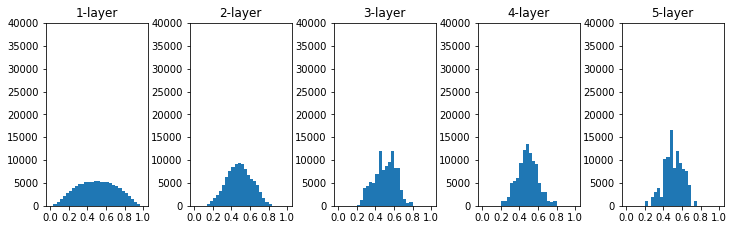

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)  #100개의 데이터
node_num = 100                  #각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           #은닉층이 5개
activations = {}                #이곳에 홣성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)   #Xavier 초기값을 사용/ sigmoid는 표준편차의 영향을 받는다
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

plt.figure(figsize=(10, 3))
for i, a in activations.items():
   plt.subplot(1, len(activations), i+1)
   plt.title(str(i+1) + "-layer")
   plt.hist(a.flatten(), 30, range=(0,1))
   plt.tight_layout(pad=0.01)
   plt.ylim(0,40000)
   plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

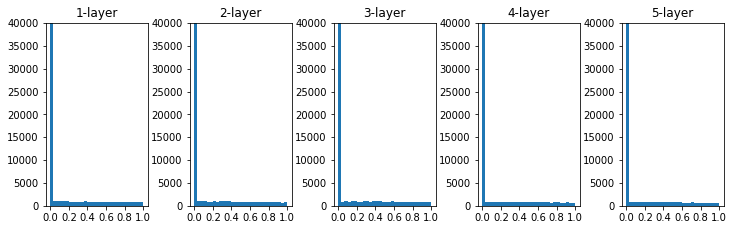

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
  return np.maximum(0, x)

x = np.random.randn(1000, 100)  #100개의 데이터
node_num = 100                  #각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5           #은닉층이 5개
activations = {}                #이곳에 홣성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num / 2)   #He 초기값을 사용/ Relu는 표준편차의 영향을 받는다
  a = np.dot(x, w)
  z = Relu(a)
  activations[i] = z

plt.figure(figsize=(10, 3))
for i, a in activations.items():
   plt.subplot(1, len(activations), i+1)
   plt.title(str(i+1) + "-layer")
   plt.hist(a.flatten(), 30, range=(0,1))
   plt.tight_layout(pad=0.01)
   plt.ylim(0,40000)
   plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.show()

epoch:0, train acc:0.09333333333333334, test acc:0.0788
epoch:1, train acc:0.10333333333333333, test acc:0.0769
epoch:2, train acc:0.12, test acc:0.0806
epoch:3, train acc:0.13, test acc:0.0846
epoch:4, train acc:0.15333333333333332, test acc:0.0887
epoch:5, train acc:0.17333333333333334, test acc:0.1043
epoch:6, train acc:0.20333333333333334, test acc:0.1177
epoch:7, train acc:0.22333333333333333, test acc:0.1308
epoch:8, train acc:0.25666666666666665, test acc:0.1472
epoch:9, train acc:0.29, test acc:0.1629
epoch:10, train acc:0.33, test acc:0.1773
epoch:11, train acc:0.3566666666666667, test acc:0.1938
epoch:12, train acc:0.36333333333333334, test acc:0.2078
epoch:13, train acc:0.37, test acc:0.2194
epoch:14, train acc:0.37666666666666665, test acc:0.235
epoch:15, train acc:0.36333333333333334, test acc:0.2382
epoch:16, train acc:0.4, test acc:0.2574
epoch:17, train acc:0.44, test acc:0.2749
epoch:18, train acc:0.4633333333333333, test acc:0.2911
epoch:19, train acc:0.49666666666666

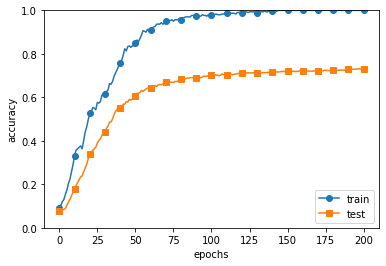

In [ ]:
import os
import sys
os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master")
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)

x_train = x_train[:300]     #(300,784)
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)    #은닉층은 6개 전체 층은 7개
optimizer = SGD(lr=0.01)
max_epochs = 201
train_size = x_train.shape[0]   #300   /300으로 잘랐으니까
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)    #3
epoch_cnt = 0

for i in range(1000000000):
  batch_mask = np.random.choice(train_size, batch_size)   #t개 중에서 b개만큼 선택 미니배치
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  grads = network.gradient(x_batch, t_batch)    #오차역전파법
  optimizer.update(network.params, grads)

  if i % iter_per_epoch == 0:   #3의 배수
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))
    epoch_cnt += 1
    
    if epoch_cnt >= max_epochs:
      break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
class Dropout :
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ration = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg: #훈련 때
      self.mask + np.random.rand(*x.shape) > self.dropout_ratio     #*x.shape 받을 매개변수가 튜플이다
      return x * self.mask
    else:          #훈련 x
      return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
      return dout * self.mask

train loss:2.3512894711775902
=== epoch:1, train acc:0.09666666666666666, test acc:0.1104 ===
train loss:2.325334245486249
train loss:2.31513696851772
train loss:2.3181513708191304
=== epoch:2, train acc:0.09666666666666666, test acc:0.1094 ===
train loss:2.316872806114976
train loss:2.3364952575115066
train loss:2.321582700742381
=== epoch:3, train acc:0.09, test acc:0.1112 ===
train loss:2.3215053600555557
train loss:2.3115433511749424
train loss:2.3022087359967243
=== epoch:4, train acc:0.09, test acc:0.1112 ===
train loss:2.319077538552417
train loss:2.303030168507182
train loss:2.3040407244723924
=== epoch:5, train acc:0.09333333333333334, test acc:0.1119 ===
train loss:2.3295714534918317
train loss:2.281079521798453
train loss:2.31715499922353
=== epoch:6, train acc:0.09666666666666666, test acc:0.1106 ===
train loss:2.308288248741825
train loss:2.3290978626485317
train loss:2.2945588553611262
=== epoch:7, train acc:0.11, test acc:0.1114 ===
train loss:2.304886671970794
train los

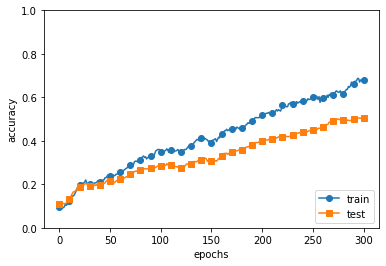

In [ ]:
# coding: utf-8
# p220 드롭아웃의 효과를 mnist 데이터셋으로 확인
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
from dataset.mnist import load_mnist
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

#훈련 데이터를 뒤섞는다
x_train, t_train = shuffle_dataset(x_train, t_train)

#20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

#7장

In [ ]:
import numpy as np

x = np.random.rand(10, 1, 28, 28) #무작위로 데이터 생성

print(x.shape)
print(x[0].shape)
print(x[1].shape)
print(x[0, 0])

(10, 1, 28, 28)
(1, 28, 28)
(1, 28, 28)
[[4.02277095e-01 1.71894235e-01 1.67011324e-01 8.11671748e-01
  5.52446798e-01 3.02888654e-01 6.99309973e-01 6.58336663e-01
  9.17218072e-01 3.78528659e-01 2.46142065e-02 3.95514732e-01
  6.54324816e-01 3.74077055e-01 4.77489196e-01 1.04769115e-01
  9.99531559e-01 7.21953253e-01 2.28597163e-01 7.28913167e-01
  1.98216770e-01 3.23137838e-01 6.10897570e-01 9.40102576e-01
  4.05002447e-01 8.07213338e-02 5.36218097e-01 2.04954174e-01]
 [3.53510934e-01 9.04930703e-01 7.78707373e-01 8.61208506e-01
  1.22390538e-01 2.83747105e-01 3.72980637e-01 2.46601522e-01
  3.45622973e-02 1.80965640e-01 6.99125540e-01 5.42852826e-01
  5.70282331e-01 7.22546121e-01 9.19235979e-02 1.28206523e-01
  8.64571128e-01 6.23834597e-01 7.37661131e-01 6.54682004e-01
  6.30866231e-01 9.27620988e-01 5.53391579e-01 5.06020331e-01
  3.16054921e-01 6.47419379e-01 3.63282158e-01 5.96491315e-01]
 [8.40940789e-01 4.86893599e-01 3.04533939e-01 5.36789249e-01
  8.94892427e-01 3.16655003e

In [ ]:
import numpy as np
import sys,os

os.chdir("/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master")
sys.path.append('/content/drive/My Drive/Colab Notebooks/deep-learning-from-scratch-master')

from common.util import im2col

x1 = np.random.rand(1, 3, 7 , 7) #(데이터수, 채널 수, 높이, 너비)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10, 3, 7 , 7)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)




(9, 75)
(90, 75)


In [ ]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """다수의 이미지를 입력받아 2차원 배열로 변환한다(평탄화).
    
    Parameters
    ----------
    input_data : 4차원 배열 형태의 입력 데이터(이미지 수, 채널 수, 높이, 너비)
    filter_h : 필터의 높이
    filter_w : 필터의 너비
    stride : 스트라이드
    pad : 패딩
    
    Returns
    -------
    col : 2차원 배열
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col



In [ ]:
class Convolution:
  def __init__(self, W, b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    FN, C, FH, FW = self.W.shape    #필터
    N, C, H, W = x.shape            #입력 데이터
    
    out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
    out_w = int(1 + (W + 2*self.pad - FW) / self.stride)

    col = im2col(x, FH, self.stride, self.pad)      #입력데이터를 4차원에서 2차원으로
    col_W = self.W.reshape(FN, -1).T    #필터 전개 / reshape(-1, FN)해도 ok
    
    out = np.dot(col, col_W) + self.b   #행렬곱 편향더하기 / 주의 편향은 삼차원 

    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)        #2차원인 결과를 4차원으로 바꾸기

    return out

In [ ]:
import numpy as np
from common.util import im2col

class Pooling:
  def __init__(self, pool_h, pool_w, stride=1,pad=0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride = stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W = x.shape
    out_h = int(1 + (H + 2*self.pad - self.pool_h) / self.stride)
    out_w = int(1 + (W + 2*self.pad - self.pool_w) / self.stride)

    #전개 (1)
    col = im2col(x, self.pool_h, self.pool_w, slef.stride, self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)

    #최댓값 (2)     각 행의 최댓값을 저장하겠다 세로 한 줄로
    out = np.max(col, axis=1)

    #성형 (3)
    out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

    return out

In [ ]:
class SimpleConvNet:
  def __init__(self, input_dim=(1,28,28),
               conv_param = {'filter_num':30, 'filter_size':5, 'pad':0,'stride':1}, 
               hidden_size=100, output_size=10, weight_init_std=0.01):
    
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
    pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))        #affine층의 가중치 형상을 맞춰주려고 계산
                                        # 풀링이 2*2라서 2로 나눠준다.
    #가중치 매개변수 초기화
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * np.random.randn(pool_out_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)

    self.layers = OrderedDict()
    self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
    self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

    self.last_layer = SoftmaxWithLoss()

  
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
      return x

  def loss(self, x, t):
    y = self.predict(x)
    return self.last_layer.forward(y, t)


  def gradient(self, x, t):
    #순전파
    self.loss(x, t)

    #역전파
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    
    #결과 저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dw
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dw
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dw
    grads['b3'] = self.layers['Affine2'].db

    return grads
